In [168]:
from sklearn.linear_model import LinearRegression 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("./deforest_data_cl.csv",encoding = "utf-8")
df.set_index("Country Code", inplace = True) 
df = df.drop("BEL")
df = df.drop("PLW")
df = df.drop(columns=['2017', '2018' ,'Unnamed: 31'])
df = df.dropna(axis=0)

In [200]:
def model_fitter(country_code):
    Data = df.loc[[country_code]]
    Data = Data.drop(columns = "Country Name")
    y = []
    years = []

    for i in list(Data.columns.values):
        y.append(float(Data[i]))
        years.append(i)

    %matplotlib inline
    plt.plot(years,y)
    plt.show()
    y = pd.DataFrame(y) 
    years = pd.DataFrame(years) 

    Model = LinearRegression()
    Model.fit(years,y)
    predictions = Model.predict(pd.DataFrame(list(range(2017,2100))))
    
    predictions = [u[0] for u in predictions]

    yx = [u[0] for u in y.values]
    yt = [0]*len(yx)
    
    
    for i in range(len(yt)):
        if i%2 == 1:
            yt[i] = yx[i]
    
    yrs = [u[0] for u in years.values]
#     %matplotlib inline
    yrs = list(range(1990,2017))
    plt.scatter(yrs,yt,c='red')
    plt.axes().set_ylim([0.7*min(predictions),1.1*max(predictions)])

    plt.plot(list(range(2017,2100)),predictions,c='blue')
    plt.show()

    return predictions

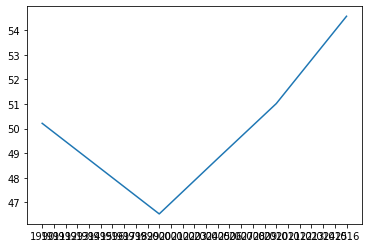

/Users/shrey/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


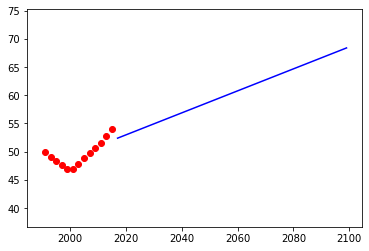

In [201]:
prediction_2017_to_2100 = model_fitter("CRI")